# Логистическая регрессия, гиперпараметры, веса

## Данные
Как обычно, сначала загрузим данные и посмотрим на них.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('news_lenta_cropped.csv')

In [4]:
df.head()

title              topic
0  Грудь Бритни Спирс вновь выскочила из лифчика ...           Культура
1  Попытка вернуть укатившийся мяч у Кремлевской ...  Силовые структуры
2                      Хабенский стал врагом Украины           Культура
3             В Туркмении запретили продажу алкоголя        Бывший СССР
4  В Великобритании нашли утерянный сценарий Стен...           Культура

In [5]:
len(df)

129930

## MultinomialNB

Посмотрим, как с классификацией справится наивный байес и CountVectorizer с дефолтными настройками.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [10]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df.title)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(bow, df.topic)

In [12]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, nb.predict(X_test)))

                   precision    recall  f1-score   support

      Бывший СССР       0.91      0.97      0.94     12914
         Культура       0.96      0.94      0.95     13187
Силовые структуры       0.90      0.85      0.87      4667
         Ценности       0.93      0.77      0.84      1715

      avg / total       0.93      0.93      0.93     32483



## Веса классов

In [18]:
nb.coef_

array([[-12.77065892, -12.07751174, -12.77065892, ..., -12.07751174,
        -12.77065892, -12.77065892],
       [-11.39164162, -10.98617651, -12.77793598, ..., -12.77793598,
        -12.0847888 , -12.77793598],
       [-12.17186932, -12.17186932, -12.17186932, ..., -12.17186932,
        -12.17186932, -12.17186932],
       [-11.71862983, -11.71862983, -11.02548265, ..., -11.71862983,
        -11.71862983, -11.02548265]])

In [28]:
two_classes = df[(df.topic == 'Культура') | (df.topic == 'Бывший СССР')]

In [36]:
two_classes.head()

title        topic
0  Грудь Бритни Спирс вновь выскочила из лифчика ...     Культура
2                      Хабенский стал врагом Украины     Культура
3             В Туркмении запретили продажу алкоголя  Бывший СССР
4  В Великобритании нашли утерянный сценарий Стен...     Культура
5  Сотня горняков под Луганском оказалась заблоки...  Бывший СССР

In [70]:
from sklearn.linear_model import LogisticRegression

In [78]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(two_classes.title)
X_train, X_test, y_train, y_test = train_test_split(bow, two_classes.topic)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

Бывший СССР       0.98      0.98      0.98     12877
   Культура       0.98      0.98      0.98     13278

avg / total       0.98      0.98      0.98     26155



In [86]:
clf.predict(vectorizer.transform(['евровидение']))

array(['Культура'], dtype=object)

In [79]:
clf.coef_

array([[ 0.03766626, -0.11159807,  0.59795629, ..., -0.03617845,
        -0.00182051,  0.        ]])

### Задание

Найдите самый значимый признак.

In [81]:
max_feat = max(clf.coef_[0])
max_feat

3.358474292703985

In [82]:
for index, val in enumerate(clf.coef_[0]):
    if val == max_feat:
        print(index)

19827


In [62]:
index2word = {}
for key in vectorizer.vocabulary_:
    index = vectorizer.vocabulary_[key]
    index2word[index] = key

In [83]:
index2word[19827]

'евровидение'

### Как отсортировать словарь

In [71]:
vocab = vectorizer.vocabulary_.items()

In [76]:
sorted_vocab = sorted(vocab, key=lambda x: x[0])

In [77]:
sorted_vocab[:10]

[('00', 0),
 ('000', 1),
 ('007', 2),
 ('01', 3),
 ('05', 4),
 ('09', 5),
 ('10', 6),
 ('100', 7),
 ('1000', 8),
 ('10000', 9)]

### Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test, nb.predict(X_test))

array([[12757,   120],
       [  403, 12875]])

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

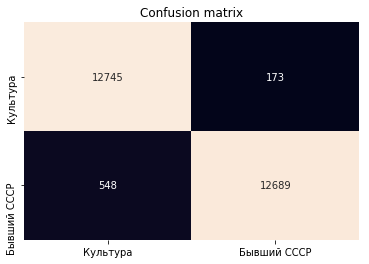

In [46]:
categories = ['Культура', 'Бывший СССР']
sns.heatmap(data=confusion_matrix(y_test, nb.predict(X_test)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

### Задание:
Нарисуйте то же самое для 4 классов.

## Другое задание

Посмотрите [здесь](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a), как построить графики для ROC и Precision-recall curve и постройте их.


### ROC

### Precision-recall curve